<a href="https://colab.research.google.com/github/PrimeshShamilka/fabric_defect_detector/blob/master/FabricDetectorModel4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

In [ ]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/darknet


In [ ]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

In [ ]:
# make darknet (build)
!make

In [ ]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

In [ ]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

In [ ]:
ls /mydrive/darknet/

In [ ]:
!cp /mydrive/darknet/obj.zip ../

In [ ]:
!unzip ../obj.zip -d data/

In [ ]:
!ls


In [ ]:
!cp -r data/obj darknet/data

In [ ]:
!cp /mydrive/darknet/yolov3-spp_custom.cfg /content/darknet/cfg

In [ ]:
!cp /mydrive/darknet/yolov3_custom_best.weights darknet/

In [ ]:
!cp /mydrive/darknet/darknet53.conv.74 darknet/

In [ ]:
!cp /mydrive/darknet/obj.data darknet/data

In [ ]:
!cp /mydrive/darknet/classes.names darknet/data

In [ ]:
!cp /mydrive/darknet/train.txt darknet/data

In [ ]:
!cp /mydrive/darknet/test.txt darknet/data

In [ ]:
!cp /mydrive/darknet/valid.txt darknet/data

In [ ]:
!cp /mydrive/darknet/yolov3-spp_custom.cfg darknet/cfg

In [ ]:
%cd /content/darknet

javascript:void(setInterval(function(){ console.log("Connect pushed"); document.querySelector("#top-toolbar > colab-connect-button").shadowRoot.querySelector("#connect").click(); },60000)) 

In [ ]:
!./darknet detector train data/obj.data cfg/yolov3-spp_model4.cfg darknet53.conv.74 -dont_show -map


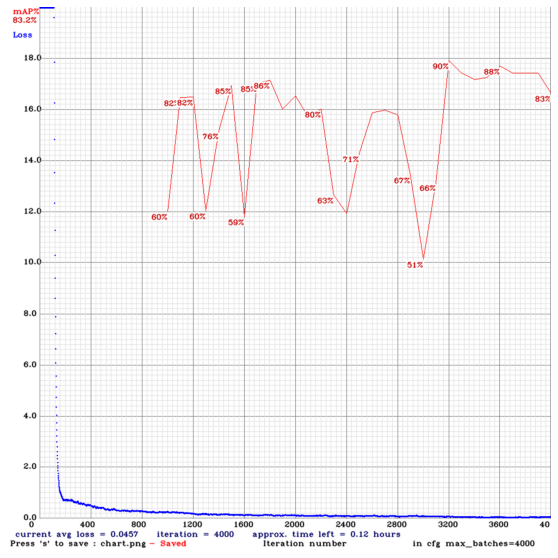

In [ ]:
imShow('chart.png')

In [ ]:
./darknet detector map data/obj.data cfg/yolov3-spp_custom.cfg backup/yolov3-spp_custom_best.weights


# VALIDATION SET RESULTS 
 
 calculation mAP (mean average precision)...
36
 detections_count = 45, unique_truth_count = 20  
class_id = 0, name = stain, ap = 89.50%   	 (TP = 19, FP = 1) 

 for conf_thresh = 0.25, precision = 0.95, recall = 0.95, F1-score = 0.95  

 for conf_thresh = 0.25, TP = 19, FP = 1, FN = 1, average IoU = 69.58 % 

 IoU threshold = 50 %, used Area-Under-Curve for each unique Recall 
 mean average precision (mAP@0.50) = 0.895000, or 89.50 % 
 
Total Detection Time: 12 Seconds


# TEST SET RESULTS

 calculation mAP (mean average precision)...
36
 detections_count = 50, unique_truth_count = 19  
class_id = 0, name = stain, ap = 60.20%   	 (TP = 12, FP = 2) 

 for conf_thresh = 0.25, precision = 0.86, recall = 0.63, F1-score = 0.73 

 for conf_thresh = 0.25, TP = 12, FP = 2, FN = 7, average IoU = 64.46 % 

 IoU threshold = 50 %, used Area-Under-Curve for each unique Recall 
 mean average precision (mAP@0.50) = 0.601951, or 60.20 % 

Total Detection Time: 13 Seconds